# Predicting 3D Bin Packing Problem Difficulty Levels: A Statistical Learning Approach

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle # To load the .pkl file

# Configure plots for better visualization
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# 1. Data Loading and Initial Inspection

In [9]:
# Load the dataset from the .pkl file
df_items = pd.read_pickle('products.pkl')

### 1.1 Initial Data Checks

In [10]:
# Display basic information
print("\nItem Dataset Info:")
df_items.info()

# Display first few rows to understand columns
print("\nFirst 5 Rows:")
print(df_items.head())

# Check for missing values
print("\nMissing Values per Column:")
missing_values = df_items.isnull().sum()
print(missing_values)


Item Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column  Non-Null Count    Dtype
---  ------  --------------    -----
 0   width   1000000 non-null  int64
 1   depth   1000000 non-null  int64
 2   height  1000000 non-null  int64
 3   weight  1000000 non-null  int64
 4   volume  1000000 non-null  int64
dtypes: int64(5)
memory usage: 38.1 MB

First 5 Rows:
   width  depth  height  weight    volume
0    284    226     119      25   7637896
1    299    207     137      90   8479341
2    534    372     229      41  45490392
3    295    134     232      31   9170960
4    266    186     178      54   8806728

Missing Values per Column:
width     0
depth     0
height    0
weight    0
volume    0
dtype: int64


Evaluatioin times are not included here!  This is going to take some more searching and considering.

# 2. Exploratory Data Analysis (EDA) of Item Properties

### 2.1 Descriptive Statistics

In [ ]:
# Summarize the numerical properties of the items. Adjust column names
width_col = 'width'
depth_col = 'depth'
height_col = 'height'
weight_col = 'weight'
volume_col = 'volume' # Assuming volume is pre-calculated

numerical_item_cols = [width_col, depth_col, height_col, weight_col, volume_col]
# Filter for columns that actually exist and are numeric
numerical_item_cols = [col for col in numerical_item_cols if col in df_items.columns and pd.api.types.is_numeric_dtype(df_items[col])]

print("\nDescriptive Statistics for Item Properties:")
print(df_items[numerical_item_cols].describe())



Descriptive Statistics for Item Properties:
                width           depth          height          weight  \
count  1000000.000000  1000000.000000  1000000.000000  1000000.000000   
mean       345.422637      237.570084      185.667199       49.131598   
std        100.650363       73.431625       74.774227      176.844530   
min         89.000000       50.000000       50.000000        2.000000   
25%        274.000000      185.000000      133.000000        2.000000   
50%        332.000000      227.000000      172.000000        7.000000   
75%        402.000000      279.000000      224.000000       28.000000   
max       1164.000000      800.000000     1043.000000     2490.000000   

             volume  
count  1.000000e+06  
mean   1.661367e+07  
std    1.334678e+07  
min    4.814000e+05  
25%    8.069610e+06  
50%    1.295799e+07  
75%    2.084354e+07  
max    3.784028e+08  


A good variety indeed!

#### 2.2 Distribution Plots

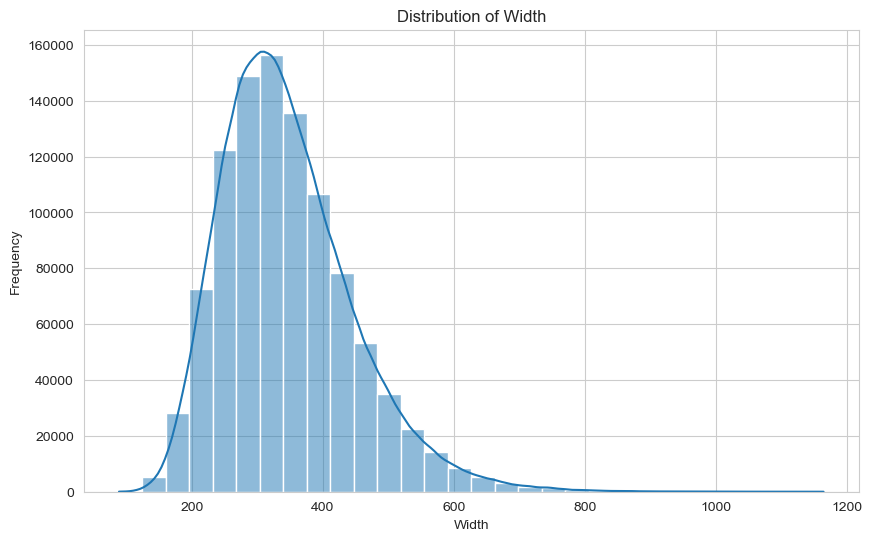

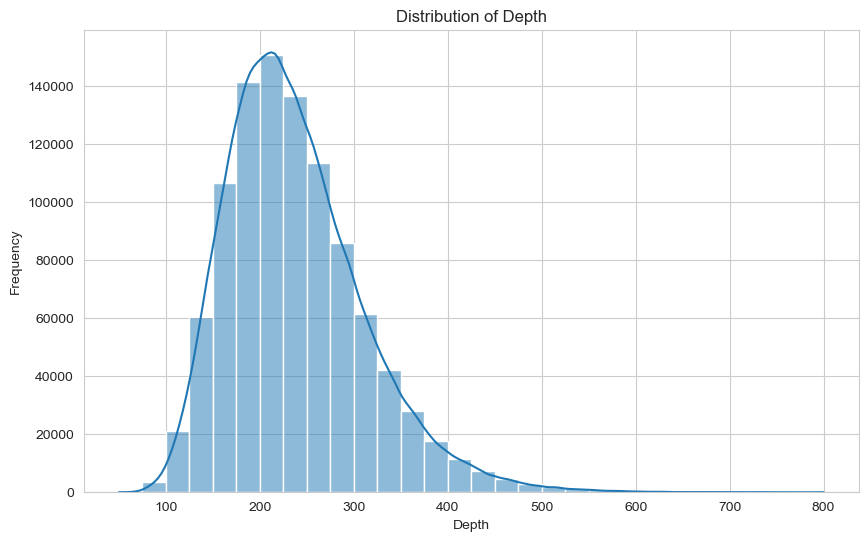

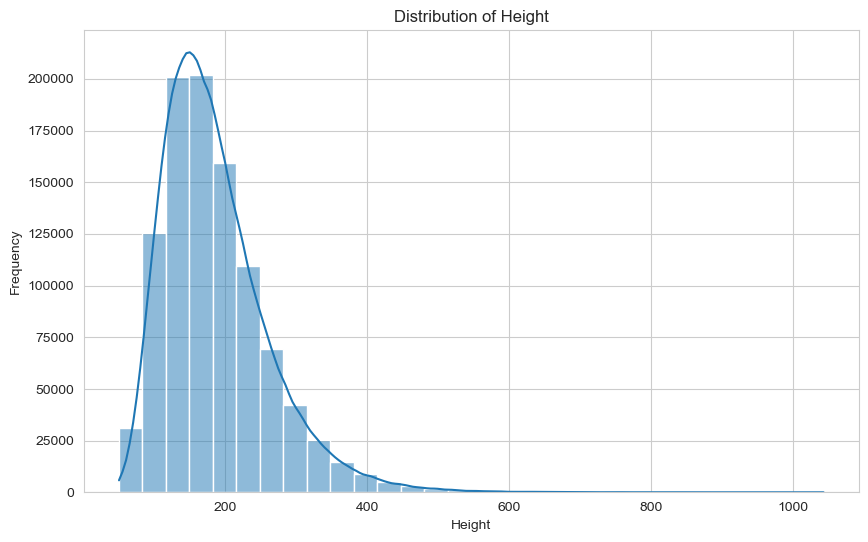

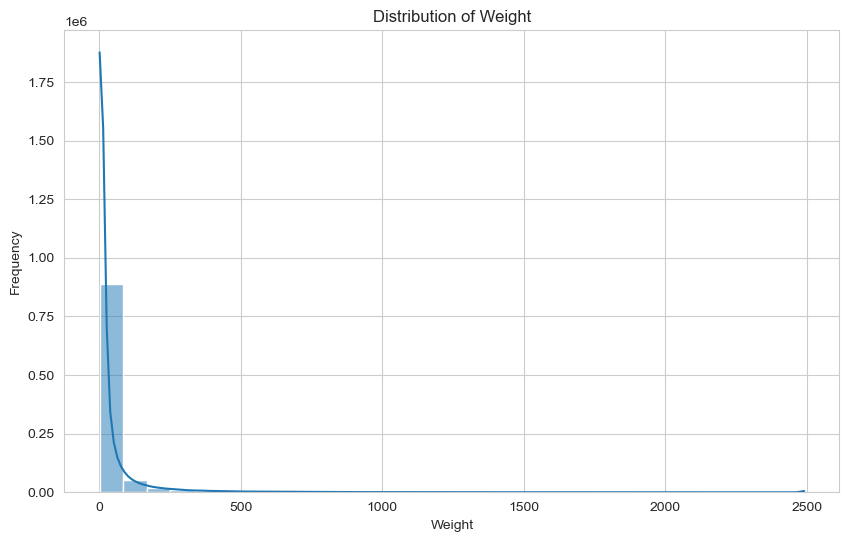

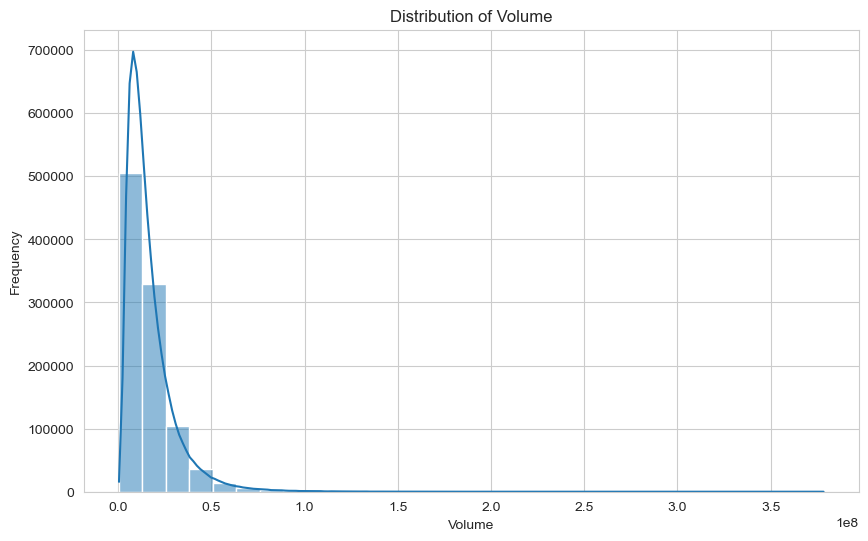

In [ ]:
# Visualize distributions of numerical item properties with histograms and KDE plots
for col in numerical_item_cols:
    plt.figure()
    sns.histplot(df_items[col].dropna(), kde=True, bins=30) 
    plt.title(f"Distribution of {col.capitalize()}")
    plt.xlabel(col.capitalize())
    plt.ylabel("Frequency")
    plt.show()

All variables show right-skewed distributions.

#### 2.3 Correlation Heatmap

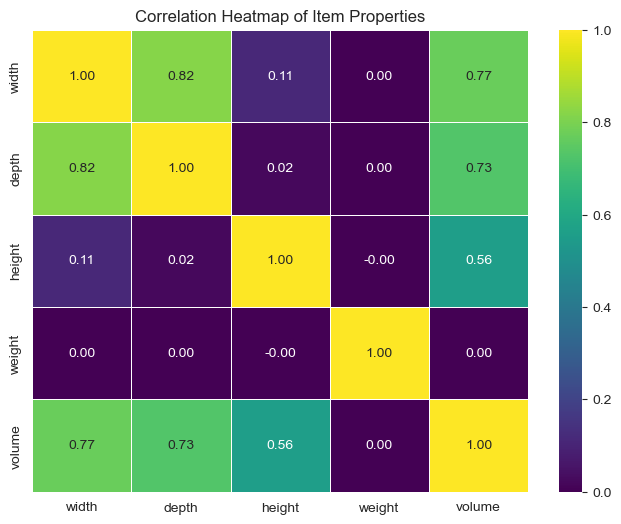

In [14]:
# Visualize correlations between the numerical item properties.
corr_matrix = df_items[numerical_item_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap of Item Properties")
plt.show()


Volume as expected.  Weight is peculiarly exactly zero with all other factors. Height is very low to width and depth. Width and depth are very similar to each other.

# 3. Conclusion & Next Steps

This initial analysis explored the `products.pkl` dataset, which defines potential items for the 3D Bin Packing Problem. The data has been loaded, missing values determined, item properties through statistics have been summarized, and their distributions and correlations have been visualized.

**Crucially, this dataset only contains item definitions.** To proceed with the primary project goal of predicting **solver performance**, the next essential step is to **generate the main dataset**. This involves:
 1. Utilizing the Python code within the `Wadaboa/3d-bpp` repository.
 2. Programmatically creating numerous 3D-BPP instances by sampling items from this `products.pkl` catalogue and defining bins.
 3. Running the repository's packing solver(s) on these instances.
 4. Recording both the instance features (e.g., `item_count`, `total_item_volume`, `bin_volume`) and the solver's performance results (`packing_efficiency`, `time_to_solve`).

 Once that performance dataset is generated, EDA on those results can be performed and proceeding with building the statistical learning models (Regression, Classification, Survival Analysis) as outlined in the First Report.

# 4. GitHub Repository Link

https://github.com/ScottDoGu/3DPuzzle